In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dim_date = pd.read_csv('Hospitality Data/Dataset/dim_date.csv')
dim_hotels = pd.read_csv('Hospitality Data/Dataset/dim_hotels.csv')
dim_rooms = pd.read_csv('Hospitality Data/Dataset/dim_rooms.csv')
fact_aggregated_bookings = pd.read_csv('Hospitality Data/Dataset/fact_aggregated_bookings.csv')
fact_bookings = pd.read_csv('Hospitality Data/Dataset/fact_bookings.csv')

In [3]:
print(dim_date.head())
print(dim_hotels.head())
print(dim_rooms.head())
print(fact_aggregated_bookings.head())
print(fact_bookings.head())


        date  mmm yy week no  day_type
0  01-May-22  May 22    W 19   weekend
1  02-May-22  May 22    W 19  weekeday
2  03-May-22  May 22    W 19  weekeday
3  04-May-22  May 22    W 19  weekeday
4  05-May-22  May 22    W 19  weekeday
   property_id  property_name  category    city
0        16558   Atliq Grands    Luxury   Delhi
1        16559  Atliq Exotica    Luxury  Mumbai
2        16560     Atliq City  Business   Delhi
3        16561      Atliq Blu    Luxury   Delhi
4        16562      Atliq Bay    Luxury   Delhi
  room_id    room_class
0     RT1      Standard
1     RT2         Elite
2     RT3       Premium
3     RT4  Presidential
   property_id check_in_date room_category  successful_bookings  capacity
0        16559     01-May-22           RT1                   25        30
1        19562     01-May-22           RT1                   28        30
2        19563     01-May-22           RT1                   23        30
3        17558     01-May-22           RT1                   1

In [4]:
print(dim_date.isnull().sum())
print(dim_hotels.isnull().sum())
print(dim_rooms.isnull().sum())
print(fact_aggregated_bookings.isnull().sum())
print(fact_bookings.isnull().sum())

date        0
mmm yy      0
week no     0
day_type    0
dtype: int64
property_id      0
property_name    0
category         0
city             0
dtype: int64
room_id       0
room_class    0
dtype: int64
property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64
booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64


In [5]:
fact_bookings.fillna(0, inplace=True)

In [6]:
fact_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,0.0,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


In [7]:
fact_bookings['booking_date'] = pd.to_datetime(fact_bookings['booking_date'])
fact_bookings['check_in_date'] = pd.to_datetime(fact_bookings['check_in_date'])
fact_bookings['checkout_date'] = pd.to_datetime(fact_bookings['checkout_date'])
dim_date['date'] = pd.to_datetime(dim_date['date'])

In [8]:
fact_bookings['stay_duration'] = (fact_bookings['checkout_date'] - fact_bookings['check_in_date']).dt.days


In [9]:
bookings_with_hotels = fact_bookings.merge( dim_hotels, on='property_id', how='left')
bookings_with_hotel=pd.DataFrame(bookings_with_hotels)
full_data = bookings_with_hotel.merge( dim_date, left_on='booking_date', right_on='date', how='left')

In [10]:
full_data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,stay_duration,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,1,Atliq Grands,Luxury,Delhi,NaT,NaN,NaN,NaN
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,9100,3640,1,Atliq Grands,Luxury,Delhi,NaT,NaN,NaN,NaN
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,3,Atliq Grands,Luxury,Delhi,NaT,NaN,NaN,NaN
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,9100,3640,1,Atliq Grands,Luxury,Delhi,NaT,NaN,NaN,NaN
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,1,Atliq Grands,Luxury,Delhi,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,3,Atliq Seasons,Business,Mumbai,2022-07-29,Jul 22,W 31,weekeday
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760,1,Atliq Seasons,Business,Mumbai,2022-07-30,Jul 22,W 31,weekend
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,0.0,Cancelled,32300,12920,2,Atliq Seasons,Business,Mumbai,2022-07-30,Jul 22,W 31,weekend
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300,1,Atliq Seasons,Business,Mumbai,2022-07-29,Jul 22,W 31,weekeday


In [11]:
print(full_data.describe())


         property_id      no_guests  ratings_given  revenue_generated  \
count  134590.000000  134590.000000  134590.000000      134590.000000   
mean    18061.113493       2.036808       1.524155       14916.013188   
std      1093.055847       1.031766       1.958380        6452.868072   
min     16558.000000       1.000000       0.000000        6500.000000   
25%     17558.000000       1.000000       0.000000        9900.000000   
50%     17564.000000       2.000000       0.000000       13500.000000   
75%     18563.000000       2.000000       3.000000       18000.000000   
max     19563.000000       6.000000       5.000000       45220.000000   

       revenue_realized  stay_duration  
count     134590.000000  134590.000000  
mean       12696.123256       2.374552  
std         6928.108124       1.733514  
min         2600.000000       1.000000  
25%         7600.000000       1.000000  
50%        11700.000000       2.000000  
75%        15300.000000       3.000000  
max        452

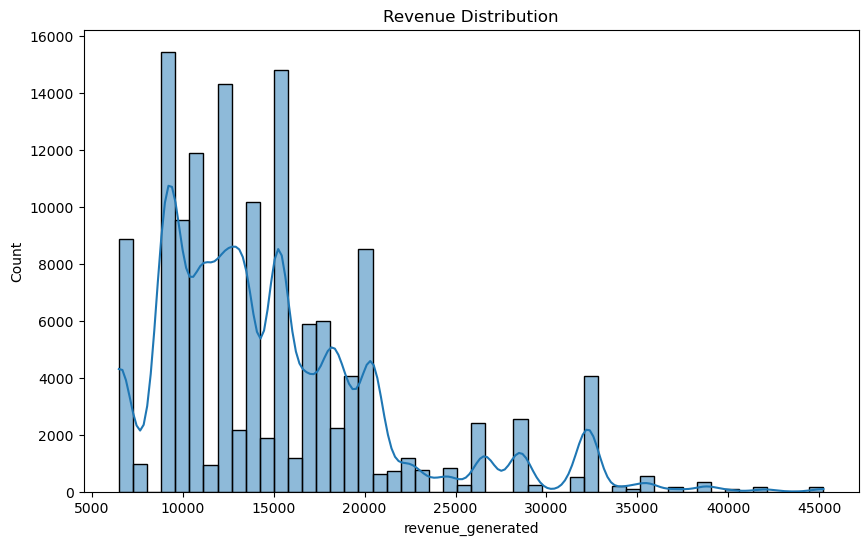

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(full_data['revenue_generated'], bins=50, kde=True)
plt.title('Revenue Distribution')
plt.show()


In [13]:
city_data = full_data[full_data['city'] == 'Mumbai']


In [14]:
weekly_revenue = full_data.groupby('week no')['revenue_generated'].sum().reset_index()


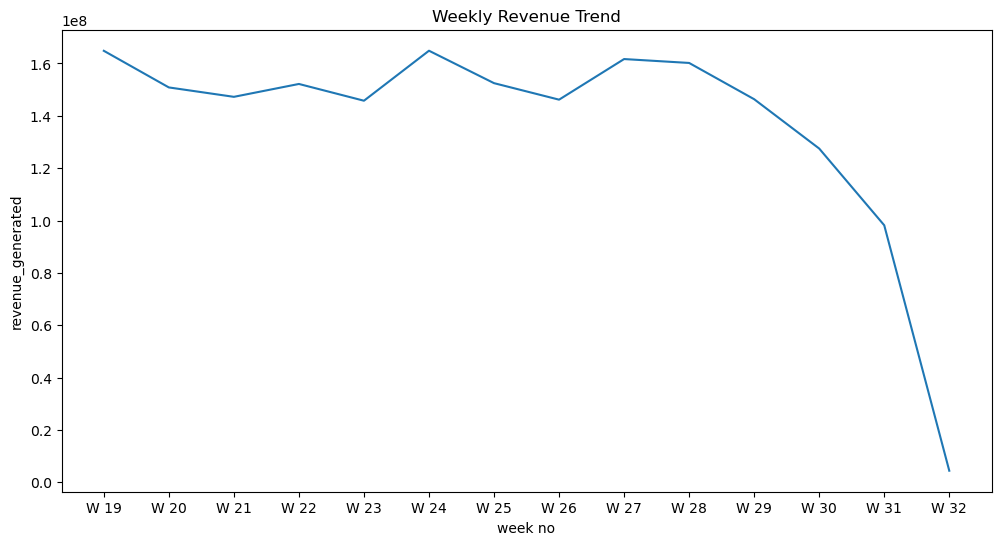

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_revenue, x='week no', y='revenue_generated')
plt.title('Weekly Revenue Trend')
plt.show()


In [16]:
full_data.to_csv('processed_data.csv', index=False)


In [17]:
full_data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,stay_duration,property_name,category,city,date,mmm yy,week no,day_type
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010,1,Atliq Grands,Luxury,Delhi,NaT,NaN,NaN,NaN
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,9100,3640,1,Atliq Grands,Luxury,Delhi,NaT,NaN,NaN,NaN
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100,3,Atliq Grands,Luxury,Delhi,NaT,NaN,NaN,NaN
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,0.0,Cancelled,9100,3640,1,Atliq Grands,Luxury,Delhi,NaT,NaN,NaN,NaN
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920,1,Atliq Grands,Luxury,Delhi,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300,3,Atliq Seasons,Business,Mumbai,2022-07-29,Jul 22,W 31,weekeday
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760,1,Atliq Seasons,Business,Mumbai,2022-07-30,Jul 22,W 31,weekend
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,0.0,Cancelled,32300,12920,2,Atliq Seasons,Business,Mumbai,2022-07-30,Jul 22,W 31,weekend
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300,1,Atliq Seasons,Business,Mumbai,2022-07-29,Jul 22,W 31,weekeday


### case study
Filters by Properties, City, Status, Platform, Month, and Week

In [18]:
def filter_by_property(data, property_name):
    return data[data['property_name'] == property_name]

In [19]:
def filter_by_city(data, city_name):
    return data[data['city'] == city_name]

In [20]:
def filter_by_status(data, status):
    return data[data['booking_status'] == status]

In [21]:
def filter_by_platform(data, platform):
    return data[data['booking_platform'] == platform]

In [22]:
def filter_by_month(data, month_year):
    return data[data['mmm yy'] == month_year]

In [23]:
def filter_by_week(data, week_no):
    return data[data['week no'] == week_no]

### Revenue, Occupancy %, and Average Rating Cards

In [24]:
total_revenue = full_data['revenue_realized'].sum()
print(f"Total Revenue: {total_revenue}")
# occupancy_percentage = (full_data['booking_status'].sum() / full_data['category'].sum()) * 100
# print(f"Occupancy Percentage: {occupancy_percentage:.2f}%")
average_rating = full_data['ratings_given'].mean()
print(f"Average Rating: {average_rating:.2f}")


Total Revenue: 1708771229
Average Rating: 1.52


### Trends by week, Occupancy by day type, Booking % by platform.

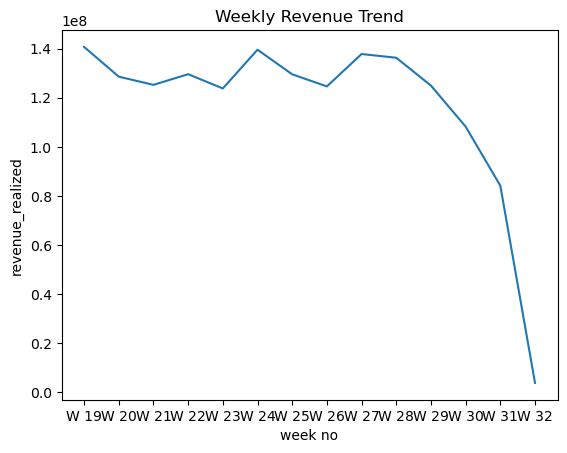

In [27]:
weekly_revenue_trend = full_data.groupby('week no')['revenue_realized'].sum().reset_index()
sns.lineplot(data=weekly_revenue_trend, x='week no', y='revenue_realized')
plt.title('Weekly Revenue Trend')
plt.show()


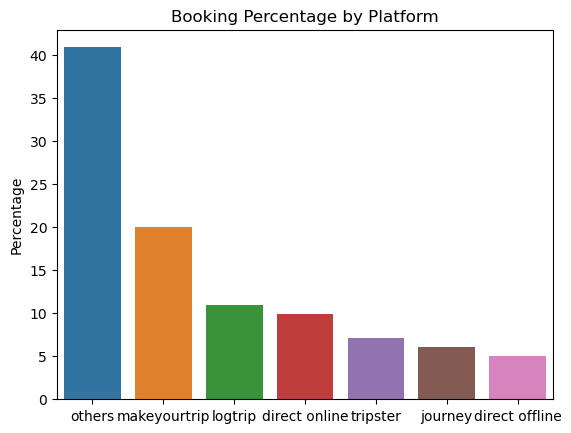

In [30]:
platform_bookings = full_data['booking_platform'].value_counts(normalize=True) * 100
sns.barplot(x=platform_bookings.index, y=platform_bookings.values)
plt.title('Booking Percentage by Platform')
plt.ylabel('Percentage')
plt.show()
